In [1]:

import numpy as np
import pandas as pd
import seaborn as sns


from moseq2_lda.data import load_representations
from moseq2_lda.model import create_lda_pipeline, run_cross_validation, train_lda_pipeline
from moseq2_lda.viz import plot_lda_results, plot_validation_curve, plot_permutation_score, Aesthetics
#%matplotlib qt

In [2]:
model_file = r"F:\moseq\2021-01-15_Meloxicam\2022-09-02_moseq\models-mean-target\rOT_model_1000-5.fixed.p"
index_file = r"F:\moseq\2021-01-15_Meloxicam\2022-09-02_moseq\moseq2-index.role.yaml"

max_syllable = 69

#groups = ['baseline', '4hrs carrageenan', '24hrs saline', '24hrs meloxicam', 'baseline meloxicam']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493', '#020887', '#647aa3'])
#markers = ['o', 's', '^', 'P', 'X']


#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan + saline']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493'])
#markers = ['o', 's', '^']
#groups = None
#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan']

#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan', '24hrs carrageenan + saline', '24hrs carrageenan + meloxicam']
#palette = sns.color_palette('deep', n_colors=len(groups))
#markers = ['o', 'v', '^', '<', '>', 's', 'p', 'P', 'D', 'X', '*', 'h', 'H', 'd'][:len(groups)]

groups = [
    'MIA bsl + saline',
    'MIA bsl + gaba',
    'MIA 3d',
    'MIA 10d + saline',
    'MIA 10d + gaba',
]


#exclude_uuids = [] # [
#    '2e4fb355-0907-4c6c-9318-11556620a9c0'
#]

In [3]:
representations = load_representations(index_file, model_file, max_syllable=max_syllable, groups=groups)
aes = Aesthetics(groups)

pruned 2460 transitions which are never used


[29 30 26 36  6 14 32 47 48 57 52 13 35 22  2  5 28  8 54 23  9  7 17  4
 49 33 37 24 38 43  3 42 10 41 31 51 20 15 39  0] [45 50 34 46 19 12 56 11  1 44 27 21 40 55 16 18 25 53]
['MIA 3d' 'MIA 10d + saline' 'MIA 3d' 'MIA 10d + gaba' 'MIA bsl + gaba'
 'MIA bsl + saline' 'MIA 3d' 'MIA 10d + saline' 'MIA 10d + gaba'
 'MIA 10d + gaba' 'MIA 3d' 'MIA bsl + gaba' 'MIA bsl + gaba'
 'MIA bsl + gaba' 'MIA 10d + saline' 'MIA 10d + saline' 'MIA 3d' 'MIA 3d'
 'MIA bsl + gaba' 'MIA 3d' 'MIA bsl + saline' 'MIA bsl + saline'
 'MIA bsl + saline' 'MIA 10d + saline' 'MIA 3d' 'MIA 3d' 'MIA 3d' 'MIA 3d'
 'MIA 10d + gaba' 'MIA bsl + gaba' 'MIA 3d' 'MIA bsl + saline'
 'MIA 10d + saline' 'MIA bsl + saline' 'MIA bsl + gaba' 'MIA 10d + gaba'
 'MIA 3d' 'MIA 10d + gaba' 'MIA 10d + saline' 'MIA bsl + saline'] ['MIA 10d + saline' 'MIA 3d' 'MIA bsl + gaba' 'MIA 10d + saline' 'MIA 3d'
 'MIA bsl + gaba' 'MIA 3d' 'MIA 10d + saline' 'MIA 10d + gaba'
 'MIA bsl + saline' 'MIA 10d + gaba' 'MIA 3d' 'MIA bsl + saline' 'MIA 

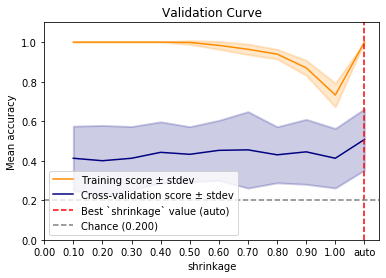

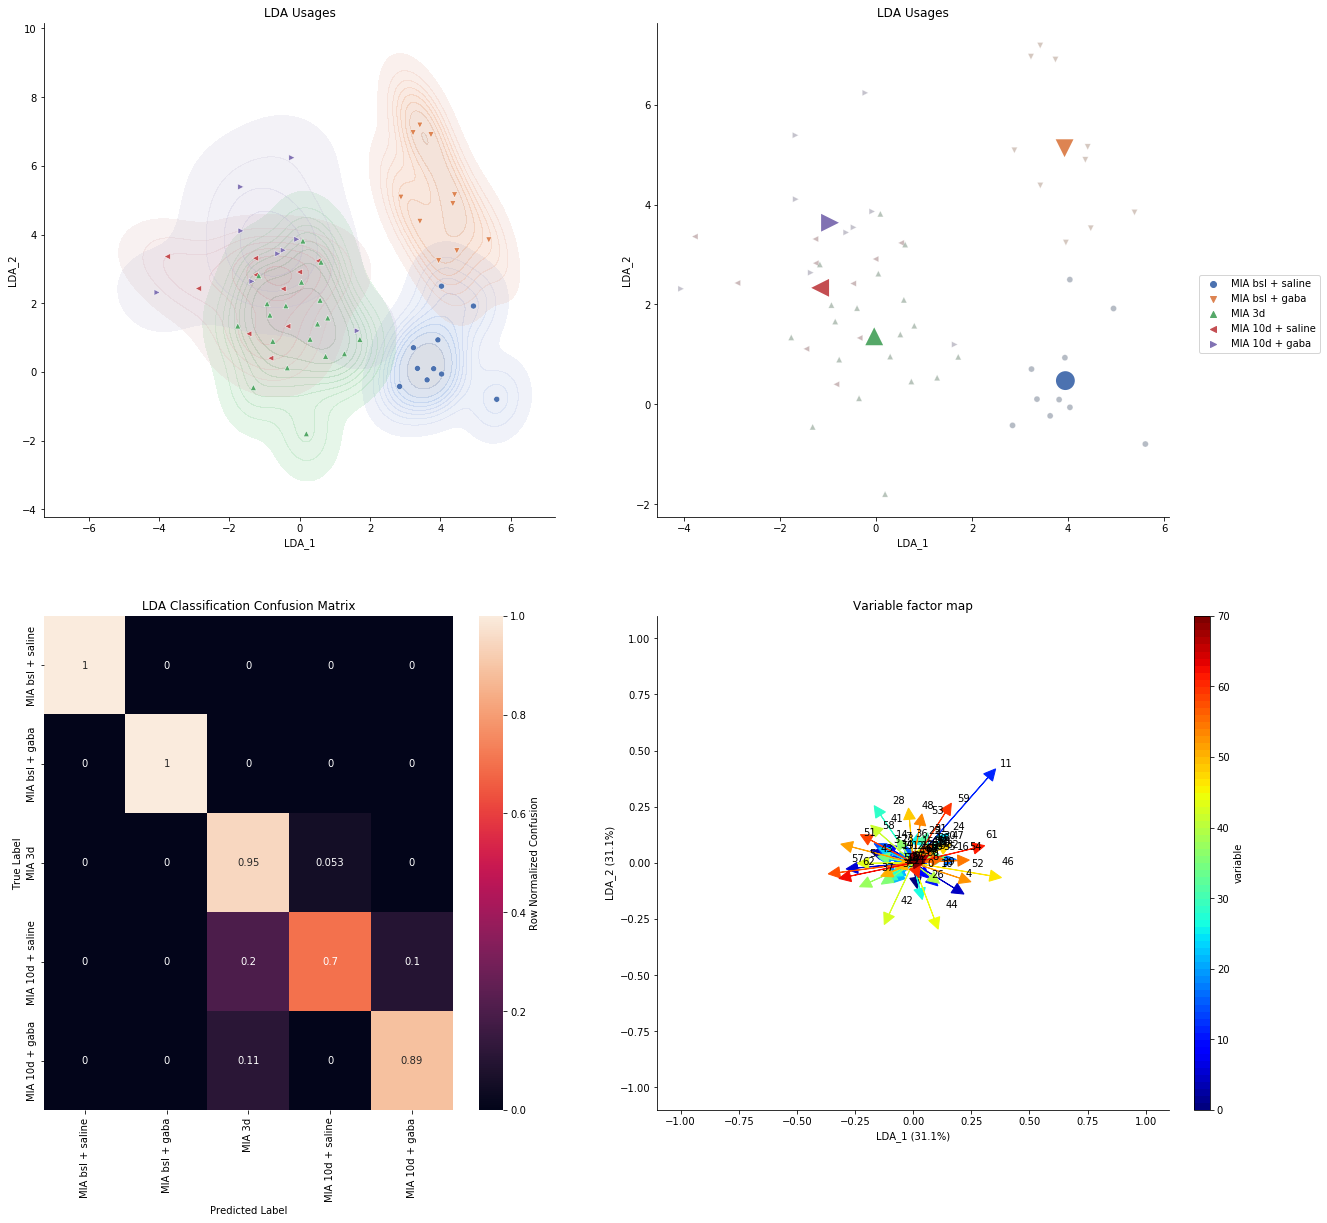

In [4]:
results = train_lda_pipeline(representations, 'usages')

plot_validation_curve(results.cv_result)
fig, axs, df = plot_lda_results(results.final, representations, aes=aes, title='LDA Usages')

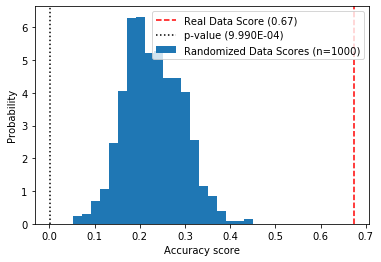

: 

In [6]:
plot_permutation_score(results.final.estimator, results.data.usages, results.data.groups)